In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ingredients_from_eda.ru.csv")

In [7]:
df["type"].value_counts()

osnovnye-blyuda     482951
salaty              243764
supy                183055
zavtraki             72089
pasta-picca          53559
sousy-marinady       51319
vypechka-deserty     39165
sendvichi            27816
bulony                3777
zagotovki             1151
zakuski               1029
Name: type, dtype: int64

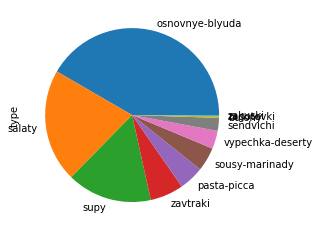

In [8]:
df["type"].value_counts().plot.pie();

In [9]:
popularity = df["ingredient"].value_counts()
popularity.head(10)

Чеснок                  45125
Соль                    39058
Оливковое масло         38959
Лук репчатый            34976
Сливочное масло         33875
Помидоры                32376
Яйцо куриное            26160
Пшеничная мука          25353
Картофель               23785
Перец черный молотый    23054
Name: ingredient, dtype: int64

<AxesSubplot:title={'center':'Наиболее популярные ингредиенты'}, xlabel='Ингредиент', ylabel='Кол-во рецептов с ним'>

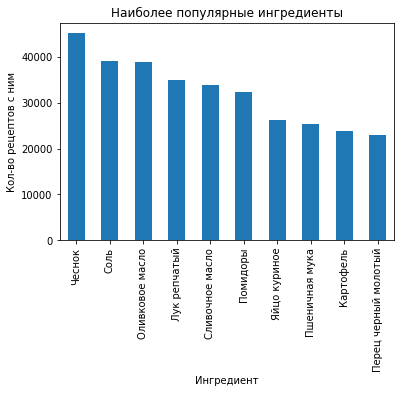

In [10]:
popularity.head(10).plot.bar(
    title="Наиболее популярные ингредиенты",
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)

In [11]:
popularity.tail(10)

Кольраби с ботвой        1
Рыба-скорпион            1
Молодые плоды люфы       1
Бульон бонито            1
Сок кинзы                1
Валенсийский апельсин    1
Бычки                    1
Специи для креветок      1
Семена черного лука      1
Кофейный экстракт        1
Name: ingredient, dtype: int64

<AxesSubplot:title={'center':'Наименее популярные ингредиенты'}, xlabel='Ингредиент', ylabel='Кол-во рецептов с ним'>

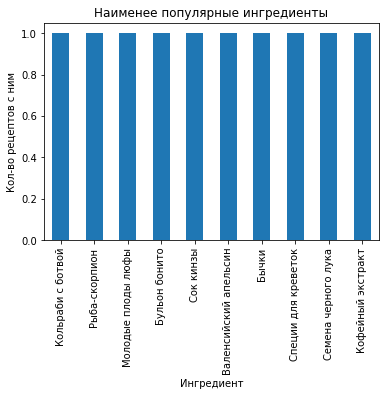

In [12]:
popularity.tail(10).plot.bar(
    title="Наименее популярные ингредиенты",
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)

In [18]:
categories = df.groupby("type").agg({"ingredient": list})
categories

,ingredient
type,
bulony,"[Грибы, Нут, Шпинат, Картофель, Сельдерей, Лук..."
osnovnye-blyuda,"[Вода, Чечевица, Лук репчатый, Морковь, Укроп,..."
pasta-picca,"[Пшеничная мука, Соль, Сахар, Вода, Оливковое ..."
salaty,"[Перец черный молотый, Консервированная фасоль..."
sendvichi,"[Черный цельнозерновой хлеб, Растительное масл..."
sousy-marinady,"[Кунжутные семечки, Кунжутное масло, Яичный же..."
supy,"[Помидоры, Вода, Кокосовая стружка, Имбирь, Ра..."
vypechka-deserty,"[Яйцо куриное, Сахарная пудра, Пшеничная мука,..."
zagotovki,"[Вода, Сахар, Соль, Уксус 9%-ный, Белокочанная..."


In [19]:
def calculating_popularity(category):
    dict_category = dict()
    for x in categories.loc[category]["ingredient"]:
        dict_category[x] = categories.loc[category]["ingredient"].count(x)
    dict_category = {k: dict_category[k] for k in sorted(dict_category, key=dict_category.get, reverse=True)}
    list = [(k, v) for k, v in dict_category.items()]
    frame = pd.DataFrame(list, columns=['Name', 'Popularity'])
    frame.set_index('Name', inplace=True)
    frame.head(10).plot.bar(
    title="Наиболее популярные в категории " + category,
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)
    print(frame)
    frame.tail(10).plot.bar(
    title="Наименее популярные в категории " + category,
    xlabel="Ингредиент",
    ylabel="Кол-во рецептов с ним"
)

                       Popularity
Name                             
Сахар                         171
Соль                           98
Вода                           71
Чеснок                         39
Черный перец горошком          38
...                           ...
Оливковое масло                 1
Сушеный орегано                 1
Сода                            1
Зеленое манго                   1
Зеленый базилик                 1

[93 rows x 1 columns]


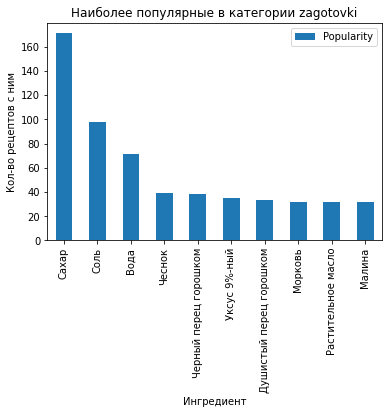

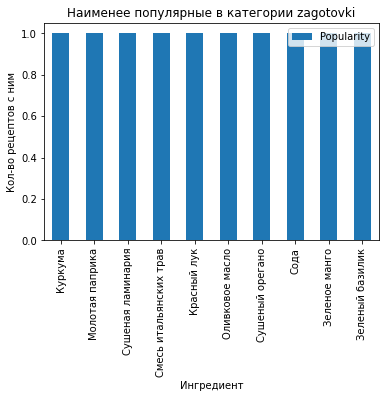

In [20]:
calculating_popularity("zagotovki")

                       Popularity
Name                             
Лук репчатый                  330
Петрушка                      253
Морковь                       208
Лавровый лист                 205
Черный перец горошком         198
...                           ...
Пекинская капуста               1
Соленые огурцы                  1
Говяжья печень                  1
Сметана                         1
Оливковый майонез               1

[214 rows x 1 columns]


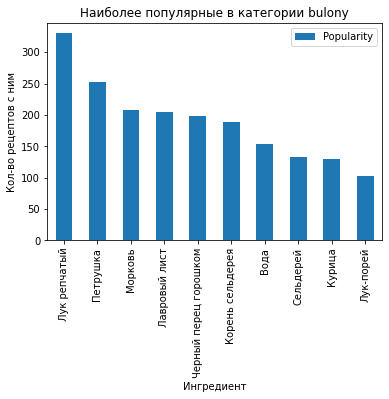

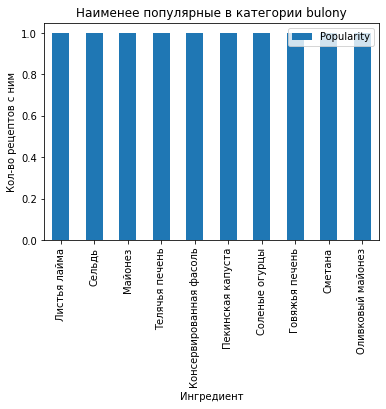

In [21]:
calculating_popularity("bulony")

In [22]:
calculating_popularity("osnovnye-blyuda")

KeyboardInterrupt: 

In [ ]:
calculating_popularity("pasta-picca")

In [ ]:
calculating_popularity("sousy-marinady")

In [ ]:
calculating_popularity("supy")

In [ ]:
calculating_popularity("vypechka-deserty")

In [ ]:
calculating_popularity("zakuski")

In [ ]:
calculating_popularity("zavtraki")

In [ ]:
calculating_popularity("salaty")

In [ ]:
calculating_popularity("sendvichi")